In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
#model performansını ölçmek için hata metrikleri

In [5]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [9]:
eksik_değerler=df.isnull().sum().sort_values(ascending=False)
#eksik değerlerikontrol edip en fazla eksik olan değişkenleri sıralama

In [11]:
print("Eksik Değerler")
print(eksik_değerler[eksik_değerler>0])

Eksik Değerler
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
bos_kategorik_deg=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu", 
                  "GarageType","GarageFinish","GarageQual","GarageCond", 
                  "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","MasVnrType"]
for col in bos_kategorik_deg:
    df[col]=df[col].fillna("None")
    df1[col]=df1[col].fillna("None")
    #Noneile doldurulacak kategorik değişkenler

In [15]:
sayisal_doldurma_deg = ["LotFrontage","GarageYrBlt","MasVnrArea"]
for col in sayisal_doldurma_deg:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    df1[col] = df1[col].fillna(median_value)
#sayisal değişkenleri medyan ile doldurma

In [16]:
kategori_doldurma_deg=["Electrical","MSZoning","Functional","Utilities","Exterior1st","Exterior2nd","SaleType"]
for col in kategori_doldurma_deg:
    mode_value=df[col].mode()[0]
    df[col]=df[col].fillna(mode_value)
    df1[col]=df1[col].fillna(mode_value)

In [17]:
#One-Hot encoding 
kategori_deg=df.select_dtypes(include=["object"]).columns
df=pd.get_dummies(df,columns=kategori_deg,drop_first=True)
df1=pd.get_dummies(df1,columns=kategori_deg,drop_first=True)

In [20]:
# Eksik olan sütunları test verisine ekleme
df1 = df1.reindex(columns=df.columns.drop("SalePrice"), fill_value=0)

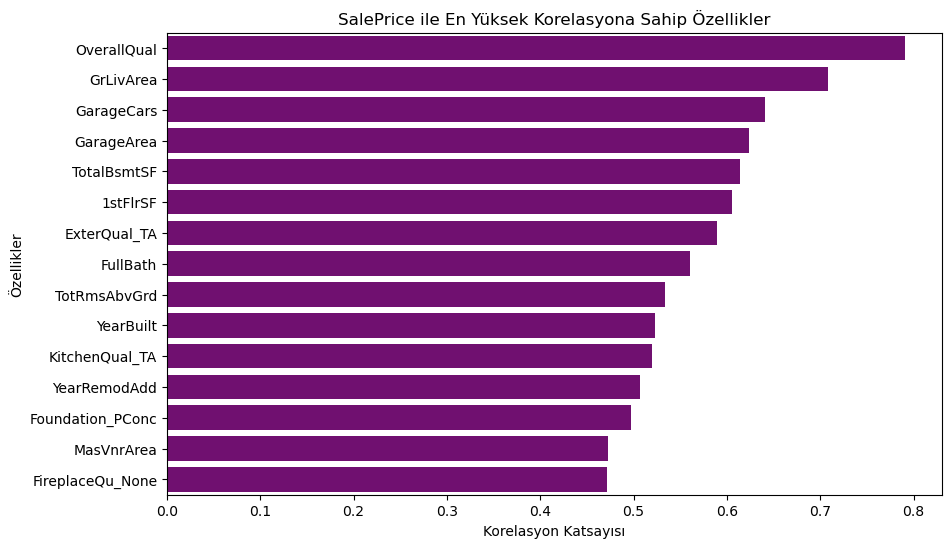

In [56]:
# Korelasyon analizi
corr_matrix = df.corr()
top_corr_features=corr_matrix["SalePrice"].abs().sort_values(ascending=False)[1:16]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values,y=top_corr_features.index,color='purple')
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Özellikler")
plt.title("SalePrice ile En Yüksek Korelasyona Sahip Özellikler")
plt.show()

In [40]:
#eğitim ve test 
x=df.drop(columns=["SalePrice"])
y=df["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
gb_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
"""gb_model) 300 ağaç ve 0.05 öğrenme oranı ile, Random Forest Regressor
(rf_model) ise 300 karar ağacı ile tanımlanır; her iki modelde de random_state=42
kullanılarak aynı sonuçların alınması sağlanır. Daha sonra, fit(x_train, y_train)
komutlarıyla modeller, eğitim
verisi (x_train) ve hedef değişken (y_train) üzerinde eğitilir""";

In [41]:
#tahmin 
y_gb=gb_model.predict(x_test)
y_rf=gb_model.predict(x_test)

In [45]:
# Model performansını değerlendirme
mae_gb = mean_absolute_error(y_test, y_gb)
mse_gb = mean_squared_error(y_test, y_gb)
mae_rf = mean_absolute_error(y_test, y_rf)
mse_rf = mean_squared_error(y_test, y_rf)
print(f"Gradient Boosting MAE: {mae_gb}, MSE: {mse_gb}")
print(f"Random Forest MAE: {mae_rf}, MSE: {mse_rf}")
"""Gradient Boosting MAE, modelin performansını ölçmek için kullanılan bir hata metriğidir.
Gradient Boosting: Kullanılan makine öğrenmesi modelinin adıdır. (Gradient Boosting Regressor)
MAE (Mean Absolute Error): Ortalama Mutlak Hata anlamına gelir.
Random Forest MAE (Mean Absolute Error), Random Forest Regressor modelinin hata oranını gösterir.
Random Forest: Karar ağaçlarının birleşiminden oluşan bir makine öğrenmesi modelidir.""";

Gradient Boosting MAE: 17207.884504108257, MSE: 824944763.7910508
Random Forest MAE: 17207.884504108257, MSE: 824944763.7910508


In [26]:
#test setini sayıssala çevirme
df1=df1.apply(pd.to_numeric,errors="coerce")

In [46]:
#NaN değerleri sıfır yapma 
df1=df1.replace([np.nan,np.inf,-np.inf],0)

In [47]:
missing_cols=set(x.columns)-set(df1.columns)
for col in missing_cols:
    df1[col] = 0
df1=df1[x.columns]
"""eğitim (df) ve test (df1) veri setlerindeki sütunları eşitleme.df içinde olup df1 
içinde olmayan sütunlar""";

In [54]:
test_predictions=gb_model.predict(df1)#Gradient Boosting modeli, test veri seti (df1)
#üzerinde tahmin yaparak her konut için tahmini fiyatları içeren bir NumPy dizisioluşturur
prediction_file=pd.DataFrame({"Id":df1.index+1461,"Price":test_predictions})
#Test veri setindeki her satır için bir ID atanır
prediction_file.to_csv("konut fiyat tahminleri .csv",index=False)

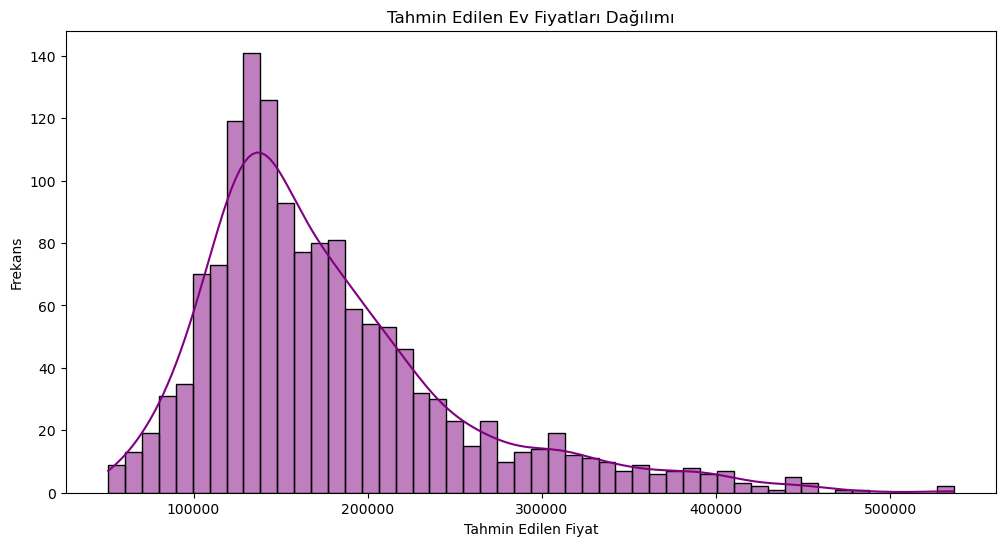

In [50]:
#Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
sns.histplot(test_predictions, bins=50, kde=True, color="purple")
plt.xlabel("Tahmin Edilen Fiyat")
plt.ylabel("Frekans")
plt.title("Tahmin Edilen Ev Fiyatları Dağılımı")
plt.show()